# Ensemble Techniques - Project

### Introduction
Parkinson’s Disease (PD) is a degenerative neurological disorder marked by decreased
dopamine levels in the brain. It manifests itself through a deterioration of movement, including
the presence of tremors and stiffness. There is commonly a marked effect on speech, including
dysarthria (difficulty articulating sounds), hypophonia (lowered volume), and monotone (reduced
pitch range). Additionally, cognitive impairments and changes in mood can occur, and risk of
dementia is increased.

Traditional diagnosis of Parkinson’s Disease involves a clinician taking a neurological history of
the patient and observing motor skills in various situations. Since there is no definitive
laboratory test to diagnose PD, diagnosis is often difficult, particularly in the early stages when
motor effects are not yet severe. Monitoring progression of the disease over time requires
repeated clinic visits by the patient. An effective screening process, particularly one that doesn’t
require a clinic visit, would be beneficial. Since PD patients exhibit characteristic vocal features,
voice recordings are a useful and non-invasive tool for diagnosis. If machine learning algorithms
could be applied to a voice recording dataset to accurately diagnosis PD, this would be an
effective screening step prior to an appointment with a clinician.

### Problem Statement
Prediction of disease

### About Dataset
This dataset is composed of a range of biomedical voice measurements from 
31 people, 23 with Parkinson's disease (PD). Each column in the table is a 
particular voice measure, and each row corresponds one of 195 voice 
recording from these individuals ("name" column). The main aim of the data 
is to discriminate healthy people from those with PD, according to "status" 
column which is set to 0 for healthy and 1 for PD.

The data is in ASCII CSV format. The rows of the CSV file contain an 
instance corresponding to one voice recording. There are around six 
recordings per patient, the name of the patient is identified in the first 
column

### Attribute Information
<b>Name </b> - ASCII subject name and recording number <br>
<b>MDVP:Fo(Hz) </b> - Average vocal fundamental frequency <br>
<b>MDVP:Fhi(Hz) </b> - Maximum vocal fundamental frequency <br>
<b>MDVP:Flo(Hz) </b> - Minimum vocal fundamental frequency <br>
<b>MDVP:Jitter(%), MDVP:Jitter(Abs), MDVP:RAP, MDVP:PPQ, Jitter:DDP </b> - Several measures of variation in fundamental frequency <br>
<b>MDVP:Shimmer, MDVP:Shimmer(dB), Shimmer:APQ3, Shimmer:APQ5, MDVP:APQ, Shimmer:DDA </b> - Several measures of variation in amplitude <br> 
<b>NHR, HNR </b> - Two measures of ratio of noise to tonal components in the voice <br>
<b>Status </b> - Health status of the subject (one) - Parkinson's, (zero) - healthy. <b>It is target variable </b> <br> 
<b>RPDE, D2 </b> - Two nonlinear dynamical complexity measures <br>
<b>DFA</b> - Signal fractal scaling exponent <br>
<b>Spread1, Spread2, PPE </b> - Three nonlinear measures of fundamental frequency variation 


### Import Required Libraries

In [309]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.preprocessing import StandardScaler, PowerTransformer, MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from scipy import stats
import warnings
warnings.filterwarnings('ignore')


### 1. Loading the dataset

In [325]:
# Read the data from file and store into dataframe
dfprksn = pd.read_csv("parkinsons.data")

In [326]:
# Read the data from dataframe
dfprksn.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


### 2. High Level Dateset Analysis

In [312]:
# Identify number of rows and attributes
dfprksn.shape

(195, 24)

<b>Observations:</b>
- Dataset contains 195 rows with 24 features

In [293]:
# Checking list of attributes and their data types
dfprksn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

<b>Observations:</b>
-  'name' is object datatype 
-  'status' is int64 datatype
- There is no missing values in dataset
- Many attributes are float64

In [294]:
# Connfirming that any missing values available in dataset
dfprksn.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

<b>Observations:</b>
- No missing values in dataset

In [295]:
# Checking whether the column has any value other than numeric values
dfprksn.iloc[:,1:][~dfprksn.iloc[:,1:].applymap(np.isreal).all(1)]

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE


<b>Observations:</b>
- All the attributes have numeric values except names. 

In [296]:
# Five points summary
dfprksn.describe().T

,count,mean,std,min,25%,50%,75%,max
MDVP:Fo(Hz),195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
MDVP:Fhi(Hz),195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
MDVP:Flo(Hz),195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
MDVP:Jitter(%),195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
MDVP:Jitter(Abs),195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
MDVP:RAP,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
MDVP:PPQ,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
Jitter:DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
MDVP:Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
MDVP:Shimmer(dB),195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


<b>Observations:</b>
- A low standard deviation indicates that the data points tend to be close to the mean of the data set, while a high standard deviation indicates that the data points are spread out over a wider range of values.
- Above one shows that MDVP:Fo(Hz), MDVP:Fhi(Hz), MDVP:Flo(Hz), rest o fthe columns have a spread closer to the mean.

In [250]:
# Verify the number of unique values in each attribute 
dfprksn.nunique()

name                195
MDVP:Fo(Hz)         195
MDVP:Fhi(Hz)        195
MDVP:Flo(Hz)        195
MDVP:Jitter(%)      173
MDVP:Jitter(Abs)     19
MDVP:RAP            155
MDVP:PPQ            165
Jitter:DDP          180
MDVP:Shimmer        188
MDVP:Shimmer(dB)    149
Shimmer:APQ3        184
Shimmer:APQ5        189
MDVP:APQ            189
Shimmer:DDA         189
NHR                 185
HNR                 195
status                2
RPDE                195
DFA                 195
spread1             195
spread2             194
D2                  195
PPE                 195
dtype: int64

<b>Observations:</b>
- 'status' attribute is categorical variable and it is target variable. 
-  The rest of the attributes are non-categorical variables since data type is float and name is unique identifier for dataset. 

### 3. Individual Attribute Analysis
#### 3a. Univarite Analysis

In [251]:
# To get Kurtosis values for each attribute
dfprksn.kurtosis(numeric_only  = True)

MDVP:Fo(Hz)         -0.627898
MDVP:Fhi(Hz)         7.627241
MDVP:Flo(Hz)         0.654615
MDVP:Jitter(%)      12.030939
MDVP:Jitter(Abs)    10.869043
MDVP:RAP            14.213798
MDVP:PPQ            11.963922
Jitter:DDP          14.224762
MDVP:Shimmer         3.238308
MDVP:Shimmer(dB)     5.128193
Shimmer:APQ3         2.720152
Shimmer:APQ5         3.874210
MDVP:APQ            11.163288
Shimmer:DDA          2.720661
NHR                 21.994974
HNR                  0.616036
status              -0.595518
RPDE                -0.921781
DFA                 -0.686152
spread1             -0.050199
spread2             -0.083023
D2                   0.220334
PPE                  0.528335
dtype: float64

In [252]:
# To get Skew values for each attribute
dfprksn.skew(numeric_only  = True)

MDVP:Fo(Hz)         0.591737
MDVP:Fhi(Hz)        2.542146
MDVP:Flo(Hz)        1.217350
MDVP:Jitter(%)      3.084946
MDVP:Jitter(Abs)    2.649071
MDVP:RAP            3.360708
MDVP:PPQ            3.073892
Jitter:DDP          3.362058
MDVP:Shimmer        1.666480
MDVP:Shimmer(dB)    1.999389
Shimmer:APQ3        1.580576
Shimmer:APQ5        1.798697
MDVP:APQ            2.618047
Shimmer:DDA         1.580618
NHR                 4.220709
HNR                -0.514317
status             -1.187727
RPDE               -0.143402
DFA                -0.033214
spread1             0.432139
spread2             0.144430
D2                  0.430384
PPE                 0.797491
dtype: float64

<b>Observations:</b>
- Many attributes are having high right skewness. 

##### Average vocal fundamental frequency MDVP:Fo(Hz)

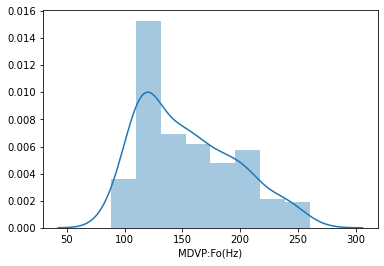

In [253]:
# Plot the distribution graph for MDVP:Fo(Hz)
sns.distplot(dfprksn['MDVP:Fo(Hz)'])

In [254]:
print("The average vocal fundamental frequency of a person is {:.2f}".format(dfprksn['MDVP:Fo(Hz)'].mean()))

The average vocal fundamental frequency of a person is 154.23


<b>Observations:</b>
- MDVP:Fo(Hz) has right skewed. 

##### Maximum vocal fundamental frequency MDVP:Fhi (Hz)

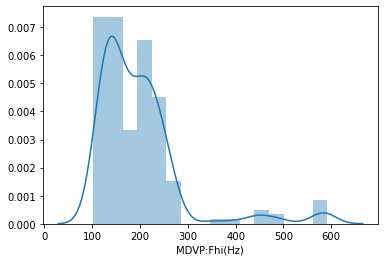

In [255]:
# Plot the distribution graph for MDVP:Fhi(Hz)
sns.distplot(dfprksn['MDVP:Fhi(Hz)'])

In [256]:
print("The maximum vocal fundamental frequency of a person is {:.2f}".format(dfprksn['MDVP:Fhi(Hz)'].mean()))

The maximum vocal fundamental frequency of a person is 197.10


<b>Observations:</b>
- MDVP:Fhi(Hz) has right skewed.

##### Minimum vocal fundamental frequency MDVP:Flo (Hz)

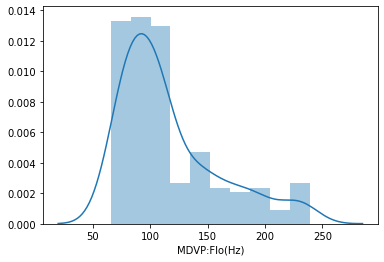

In [257]:
# Plot the distribution graph for MDVP:Flo(Hz)
sns.distplot(dfprksn['MDVP:Flo(Hz)'])

In [258]:
print("The minimum vocal fundamental frequency of a person is {:.2f}".format(dfprksn['MDVP:Flo(Hz)'].mean()))

The minimum vocal fundamental frequency of a person is 116.32


<b>Observations:</b>
- MDVP:Flo(Hz) has right skewed.

##### Five measures of variation in fundamental frequency

Mean of MDVP:Jitter(%) is 0.006220461538461539
Mean of MDVP:Jitter(Abs) is 4.395897435897438e-05
Mean of MDVP:RAP is 0.0033064102564102577
Mean of MDVP:PPQ is 0.003446358974358974
Mean of Jitter:DDP is 0.009919948717948712


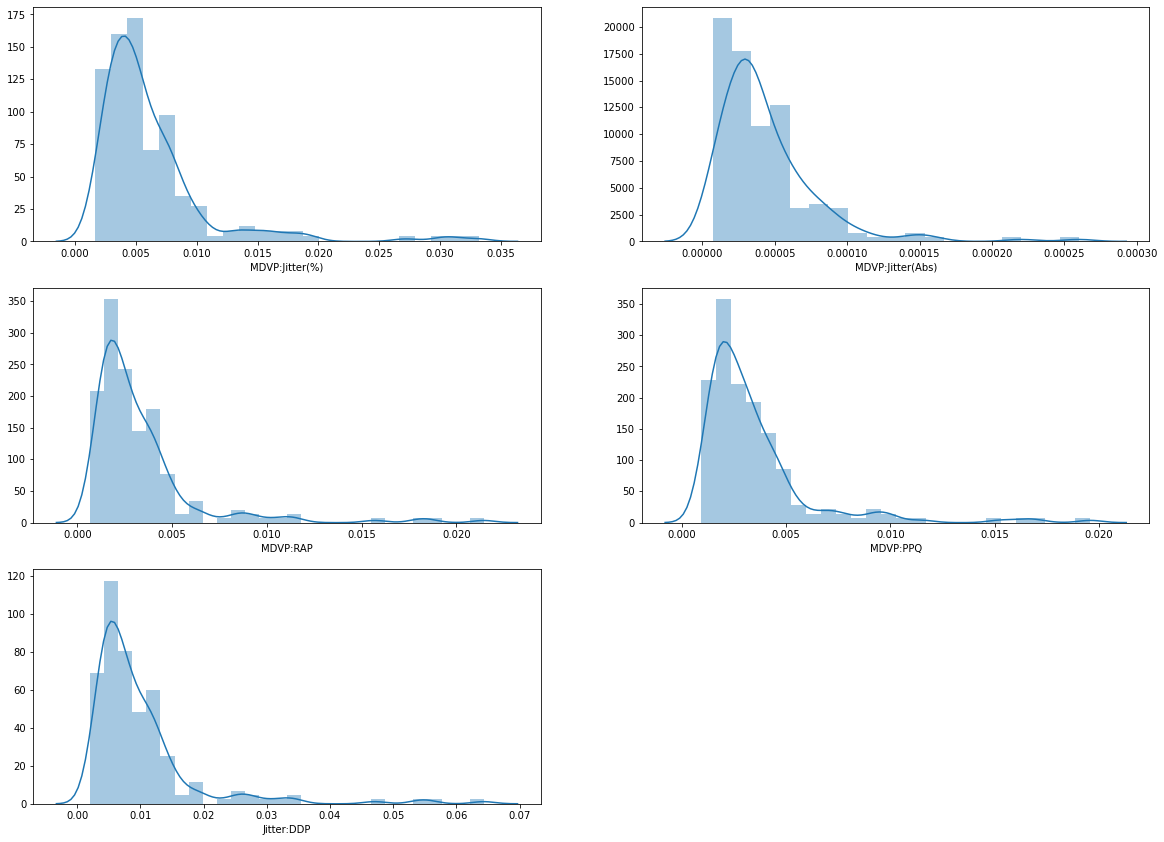

In [259]:
# Plot the distribution graph for MDVP:Jitter(%), MDVP:Jitter(Abs), MDVP:RAP, MDVP:PPQ and Jitter:DDP
col = ['MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP']
plt.figure(figsize=(20,25))
for i,col in enumerate(col):
    plt.subplot(5,2,i+1)
    sns.distplot(dfprksn[col])
    print("Mean of",col,"is", dfprksn[col].mean())

<b>Observations:</b>
- MDVP:Jitter(%), MDVP:Jitter(Abs), MDVP:RAP, MDVP:PPQ, and Jitter:DDP are having right skewed. 

##### Six measures of variation in amplitude

Mean of MDVP:Shimmer is 0.0297091282051282
Mean of MDVP:Shimmer(dB) is 0.2822512820512821
Mean of Shimmer:APQ3 is 0.015664153846153845
Mean of Shimmer:APQ5 is 0.01787825641025642
Mean of MDVP:APQ is 0.02408148717948718
Mean of Shimmer:DDA is 0.04699261538461537


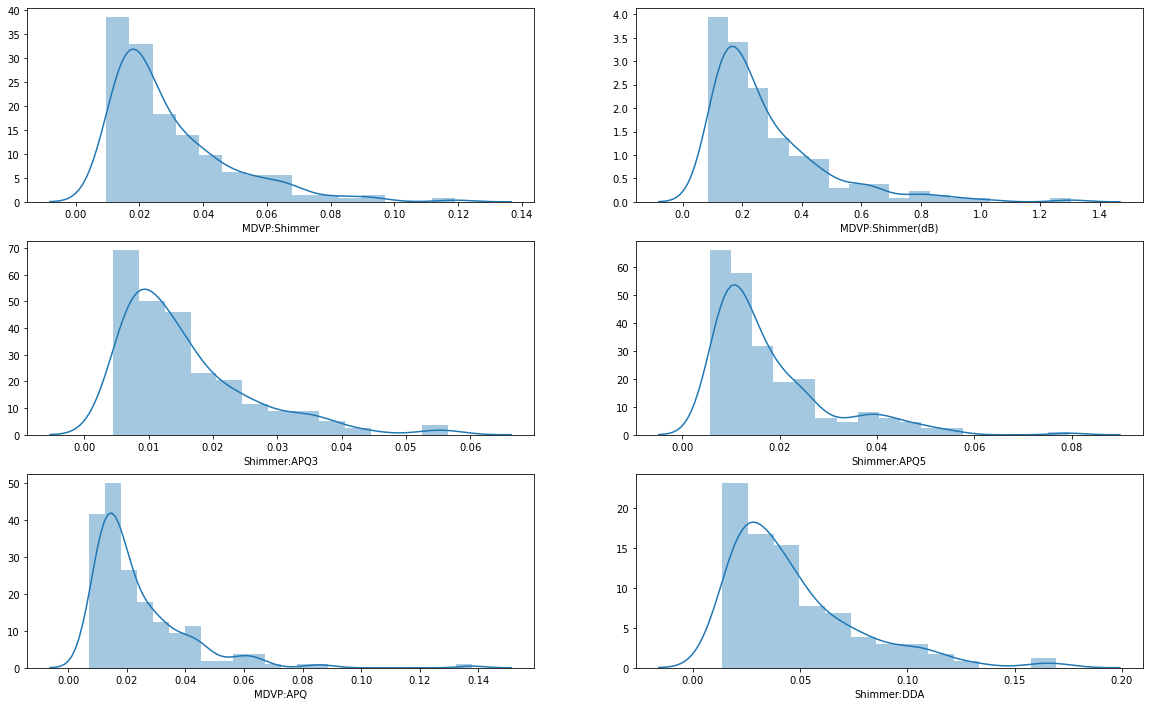

In [260]:
# Plot the distribution graph for MDVP:Shimmer, MDVP:Shimmer(dB), Shimmer:APQ3, Shimmer:APQ5, MDVP:APQ and Shimmer:DDA
col = ['MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ','Shimmer:DDA']
plt.figure(figsize=(20,25))
for i,col in enumerate(col):
    plt.subplot(6,2,i+1)
    sns.distplot(dfprksn[col])
    print("Mean of",col,"is", dfprksn[col].mean())

<b>Observations:</b>
- MDVP:Shimmer, MDVP:Shimmer(dB), Shimmer:APQ3, Shimmer:APQ5, MDVP:APQ and Shimmer:DDA are having right skewed.

##### Two measures of ratio of noise to tonal components in the voice

Mean of NHR is 0.024847076923076923
Mean of HNR is 21.885974358974366


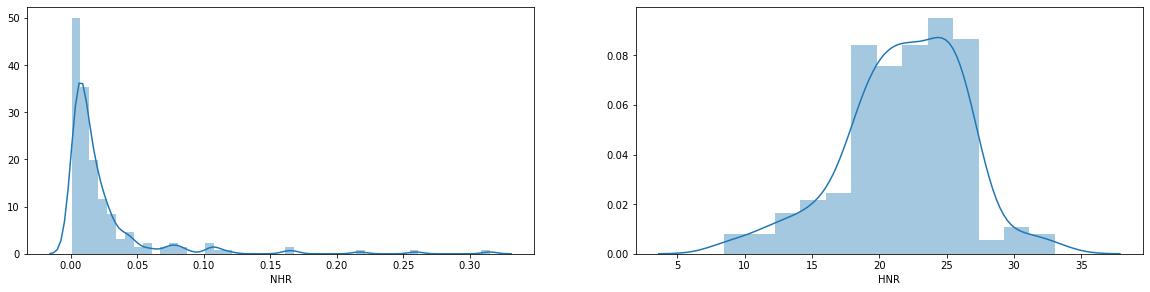

In [261]:
# Plot the distribution graph for NHR and HNR
col = ['NHR', 'HNR']
plt.figure(figsize=(20,10))
for i,col in enumerate(col):
    plt.subplot(2,2,i+1)
    sns.distplot(dfprksn[col])
    print("Mean of",col,"is", dfprksn[col].mean())

<b>Observations:</b>
- NHR has highly right skewed.
- HNR has left skewed.

##### Two nonlinear dynamical complexity measures

Mean of RPDE is 0.4985355384615386
Mean of D2 is 2.3818260871794874


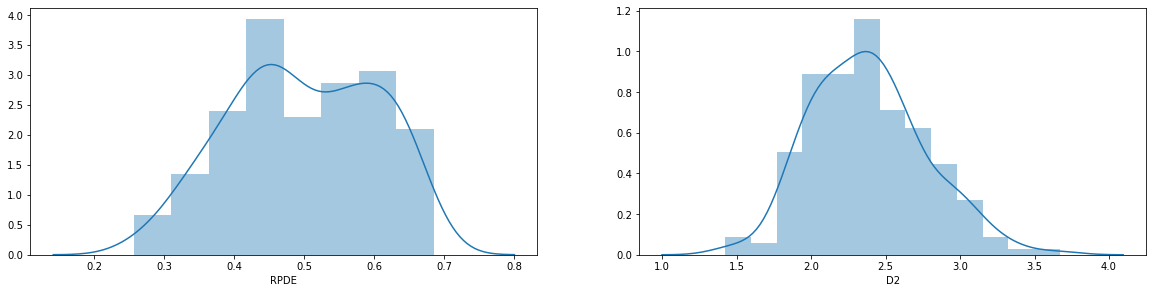

In [262]:
# Plot the distribution for RPDE and D2
col = ['RPDE', 'D2']
plt.figure(figsize=(20,10))
for i,col in enumerate(col):
    plt.subplot(2,2,i+1)
    sns.distplot(dfprksn[col])
    print("Mean of",col,"is", dfprksn[col].mean())

<b>Observations:</b>
- RPDE has left skewed.
- D2 has right skewed.

##### Three nonlinear measures of fundamental frequency variation

Mean of spread1 is -5.684396743589743
Mean of spread2 is 0.2265103487179486
Mean of PPE is 0.20655164102564108


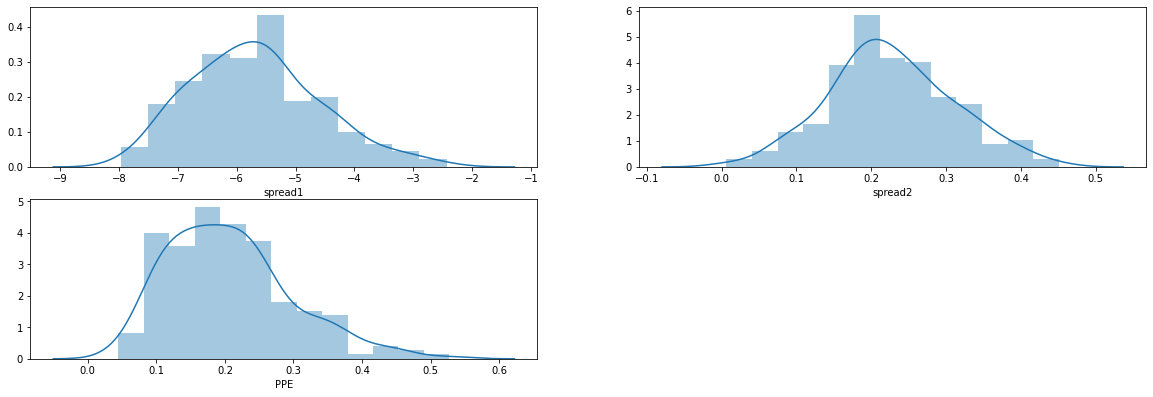

In [263]:
# Plot the distribution for spread1, spread2 and PPE
col = ['spread1', 'spread2', 'PPE']
plt.figure(figsize=(20,10))
for i,col in enumerate(col):
    plt.subplot(3,2,i+1)
    sns.distplot(dfprksn[col])
    print("Mean of",col,"is", dfprksn[col].mean())

<b>Observations:</b>
- spread1 and PPE are having right skewed.
- spread2 looks like normally distributed. 

##### Signal fractal scaling exponent

Mean of DFA is 0.7180990461538465


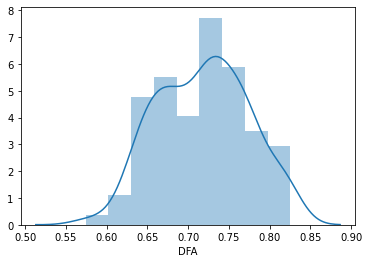

In [264]:
# Plot the distribution graph for DFA
sns.distplot(dfprksn['DFA'])
print("Mean of DFA is", dfprksn['DFA'].mean())

<b>Observations:</b>
- DFA has slightly left skewed.

##### Health Status - Target variable distribution

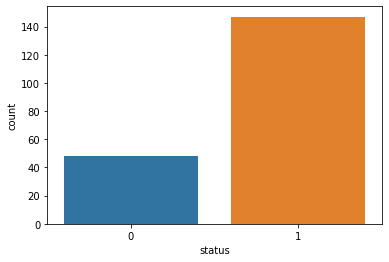

In [265]:
# Plot the distribution graph for Status
sns.countplot(dfprksn['status'])

<b>Observations:</b>
- It shows imbalanced target variable.

#### 3b. Bivariate Analysis

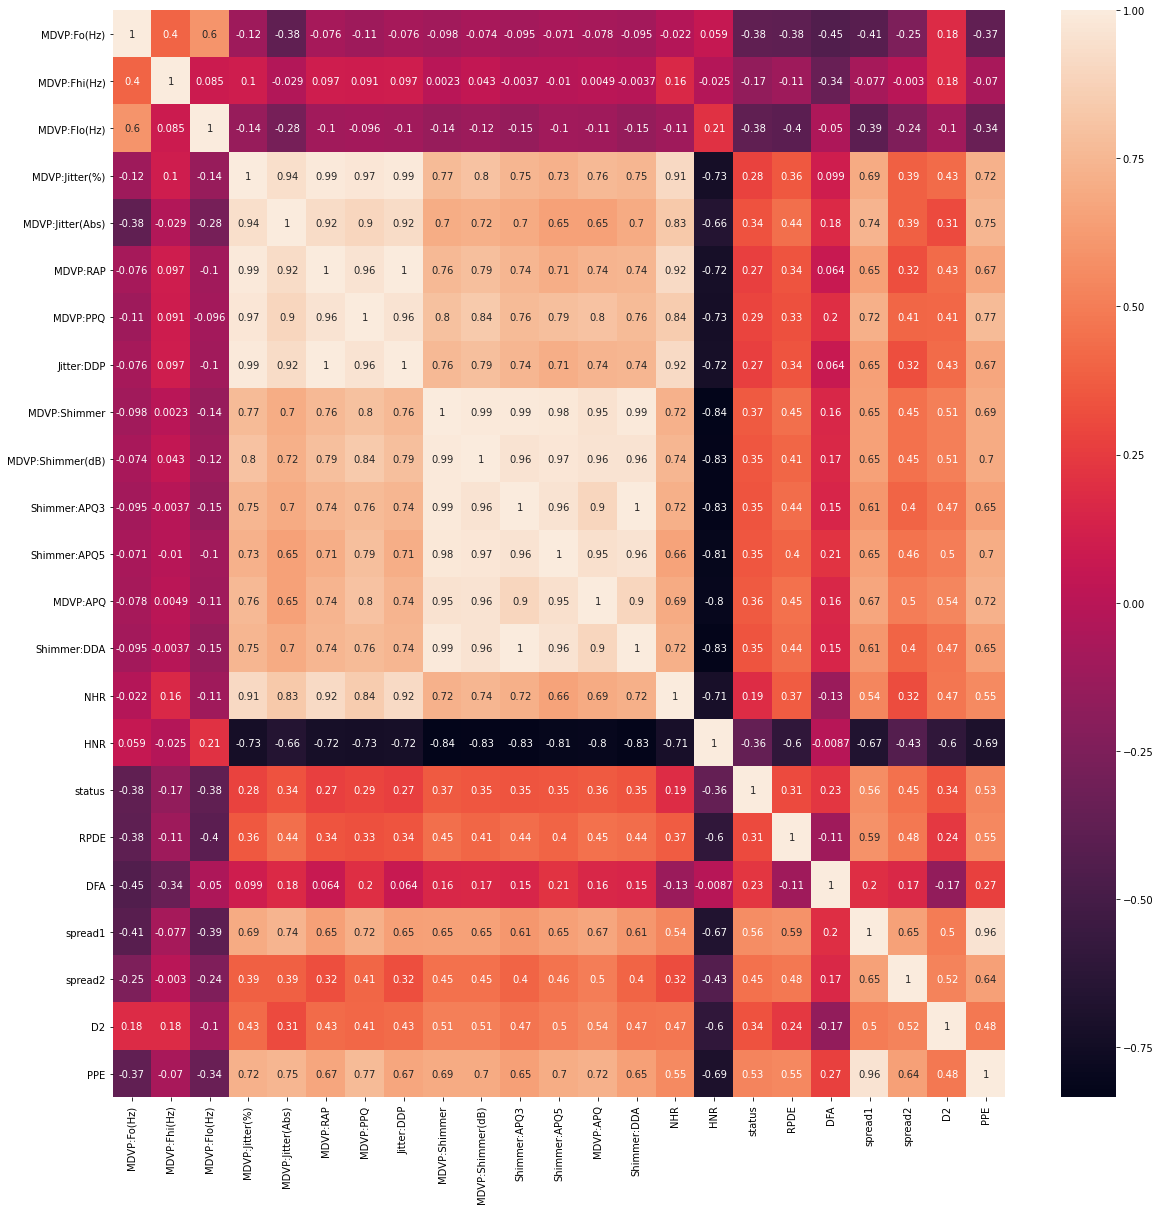

In [266]:
# Find the correlations between the variables
plt.figure(figsize=(20,20))
sns.heatmap(dfprksn.corr(), annot=True)

<b>Observations:</b>
- MDVP:Jitter(%) has a very high correlation with MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP
- MDVP:Shimmer has a very correlation with MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA this may be because they are related to each other. This may be because multi-dimensinal voice programs analysis is closely related with these variables.
- NHR has a strong correlation with MDVP:Jitter(%),MDVP:RAP and Jitter:DDP. 
- HNR has negative correlation with MDVP:Shimmer, MDVP:Shimmer(dB),MDVP:APQ,Shimmer:DDA. 
- The target variable status has a weak positive corelation with spread1

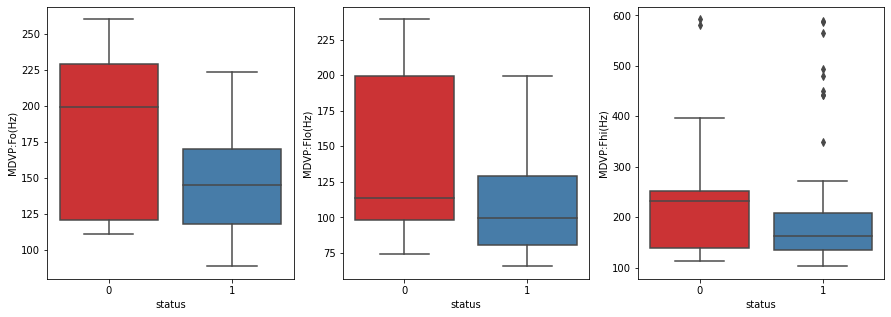

In [267]:
# Plot the grapy for MDVP:Fo(Hz), MDVP:Flo(Hz), MDVP:Fhi(Hz) with Status 
fig, ax = plt.subplots(1,3,figsize=(15,5))
sns.boxplot(x='status',y='MDVP:Fo(Hz)',data=dfprksn,palette="Set1",ax=ax[0])
sns.boxplot(x='status',y='MDVP:Flo(Hz)',data=dfprksn,palette="Set1",ax=ax[1])
sns.boxplot(x='status',y='MDVP:Fhi(Hz)',data=dfprksn,palette="Set1",ax=ax[2])

<b>Observations:</b>
- MDVP:Fo(Hz): Median value is around 199Hz for people who are normal while median value is around 145Hz who are affected with Parkinsons.
- MDVP:Fhi(Hz) doesn't show variations with status. 
- MDVP:Flo(Hz): Median value is around 115Hz for people who are normal while median value is around 100Hz who are affected with Parkinsons.
    

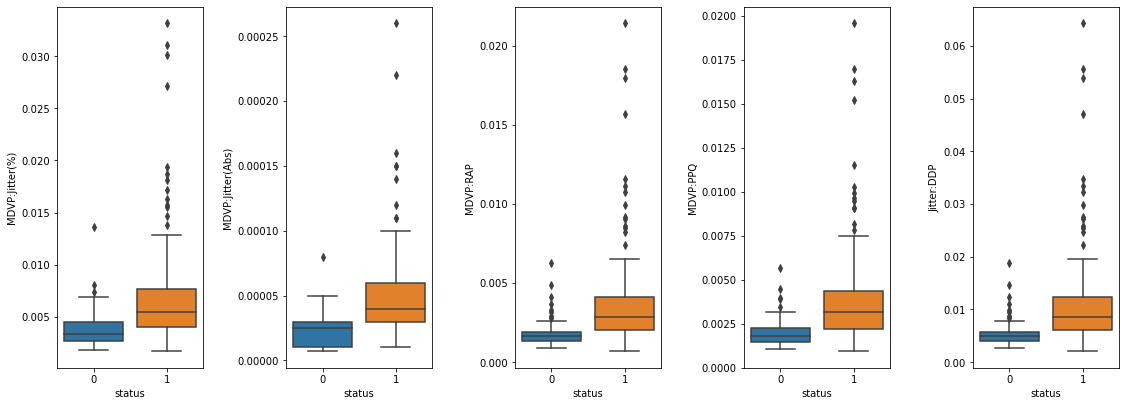

In [268]:
# Plot the graph for MDVP:Jitter(%), MDVP:Jitter(Abs), MDVP:RAP, MDVP:PPQ, Jitter:DDP with Status
cols = ["MDVP:Jitter(%)","MDVP:Jitter(Abs)","MDVP:RAP","MDVP:PPQ","Jitter:DDP"]
fig, axs = plt.subplots(ncols = 5,figsize=(16,6))
fig.tight_layout()
for i in range(0,len(cols)):
    sns.boxplot(x='status',y=cols[i],data=dfprksn, ax = axs[i])
fig.tight_layout(pad=2.0)

<b>Observations:</b>
- People who are suffering for PD tend to have higher jitter %. It seems if the value goes above 0.015 we can confirm the patient is having PD. 
- Similarly, if the values of jitter(Abs), MDVP:RAP, MDVP:PPQ and jitter:DDP are going above 0.00010, 0.008, 0.0065, 0.02 respectively, we can come to conclusion that patient is having PD. 
- The variation of fundamental frequency is in a low range for people who is normal.   

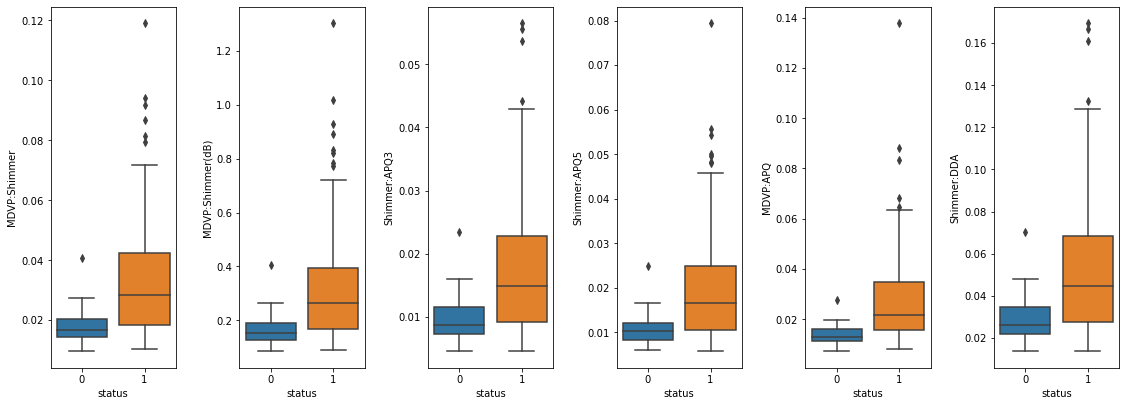

In [269]:
# Plot the graph for MDVP:Shimmer, MDVP:Shimmer(dB), Shimmer:APQ3, Shimmer:APQ5, MDVP:APQ,Shimmer:DDA with Status
cols = ['MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ','Shimmer:DDA']
fig, axs = plt.subplots(ncols = 6,figsize=(16,6))
fig.tight_layout()
for i in range(0,len(cols)):
    sns.boxplot(x='status',y=cols[i],data=dfprksn, ax = axs[i])
fig.tight_layout(pad=2.0)

<b>Observations:</b>
- The people who affected with PD if frequency of MDVP:Shimmer and MDVP:Shimmer(dB) is going beyond 0.4.
- Similarly, if the values of Shimmer:APQ3, Shimmer:APQ5, MDVP:APQ and Shimmer:DDA are going above 0.025, 0.03, 0.03, 0.08 respectively, we can come to conclusion that patient is having PD.

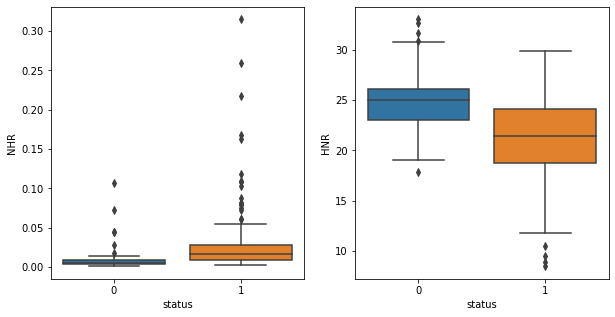

In [270]:
# Plot the graph for NHR, HNR with Status
fig, ax = plt.subplots(1,2,figsize=(10,5))
sns.boxplot(x='status',y='NHR',data=dfprksn,ax=ax[0])
sns.boxplot(x='status',y='HNR',data=dfprksn,ax=ax[1])

<b>Observations:</b>
- People who have PD(status equal to one) have higher levels of Noise to Harmonic ratio. Also, looking into the HNR ratio people who have PD have lower levels in the same.

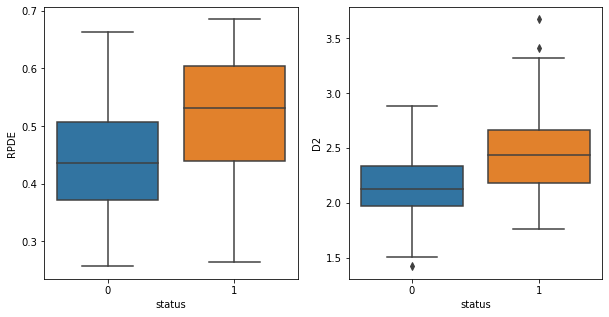

In [271]:
# Plot the graph for RPDE, D2 with Status
fig, ax = plt.subplots(1,2,figsize=(10,5))
sns.boxplot(x='status',y='RPDE',data=dfprksn,ax=ax[0])
sns.boxplot(x='status',y='D2',data=dfprksn,ax=ax[1])

<b>Observations:</b>
- RPDE has no significant impact on status. 

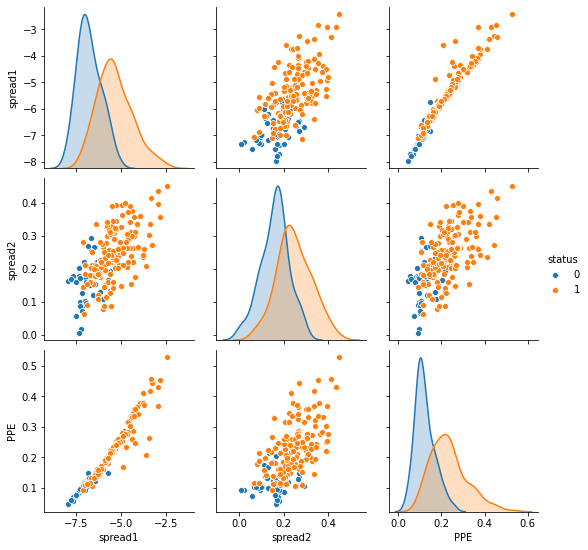

In [272]:
# Plot the pair plot for Spread1, Spread2 and PPE with Status
sns.pairplot(dfprksn, vars=['spread1', 'spread2', 'PPE'], hue = "status",diag_kind="kde")

<b>Observations:</b>
- Spread1 is normally distributed between person who have PD and who is normal. Spread1 has significant impact on status. Spread1 is normally distributed between person who have PD and who is normal. People who have spread1 between - 8.5 and -7.5 are more and they are normal. People whose spread1 is between -6.5 and -5 are having PD
- There is a strong relationship between spread1 and PPE. 

### 4. Split the dataset into training and test set in the ratio of 70:30 

In [327]:
# Remove the name attribute from dataset as it is unique identifier. 
dfprksn.drop('name',axis=1, inplace=True)

# Spliting independent variables and depended variable
X=dfprksn.drop('status',axis=1) #Independent variables
y=dfprksn['status'] #Dependent variable

# Split the train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=9)

In [328]:
# Apply the Scaling 
pt = MinMaxScaler()
scaledXtrain = pt.fit_transform(X_train)
scaledXtest = pt.transform(X_test)

### 5. Create the model using Decision Tree with entropy method

In [329]:
#Initiliazie DecisionTree using entropy method.
dt_model = DecisionTreeClassifier(criterion = 'entropy', random_state=9)

#fit the data to the model
dt_model.fit(scaledXtrain, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=9)

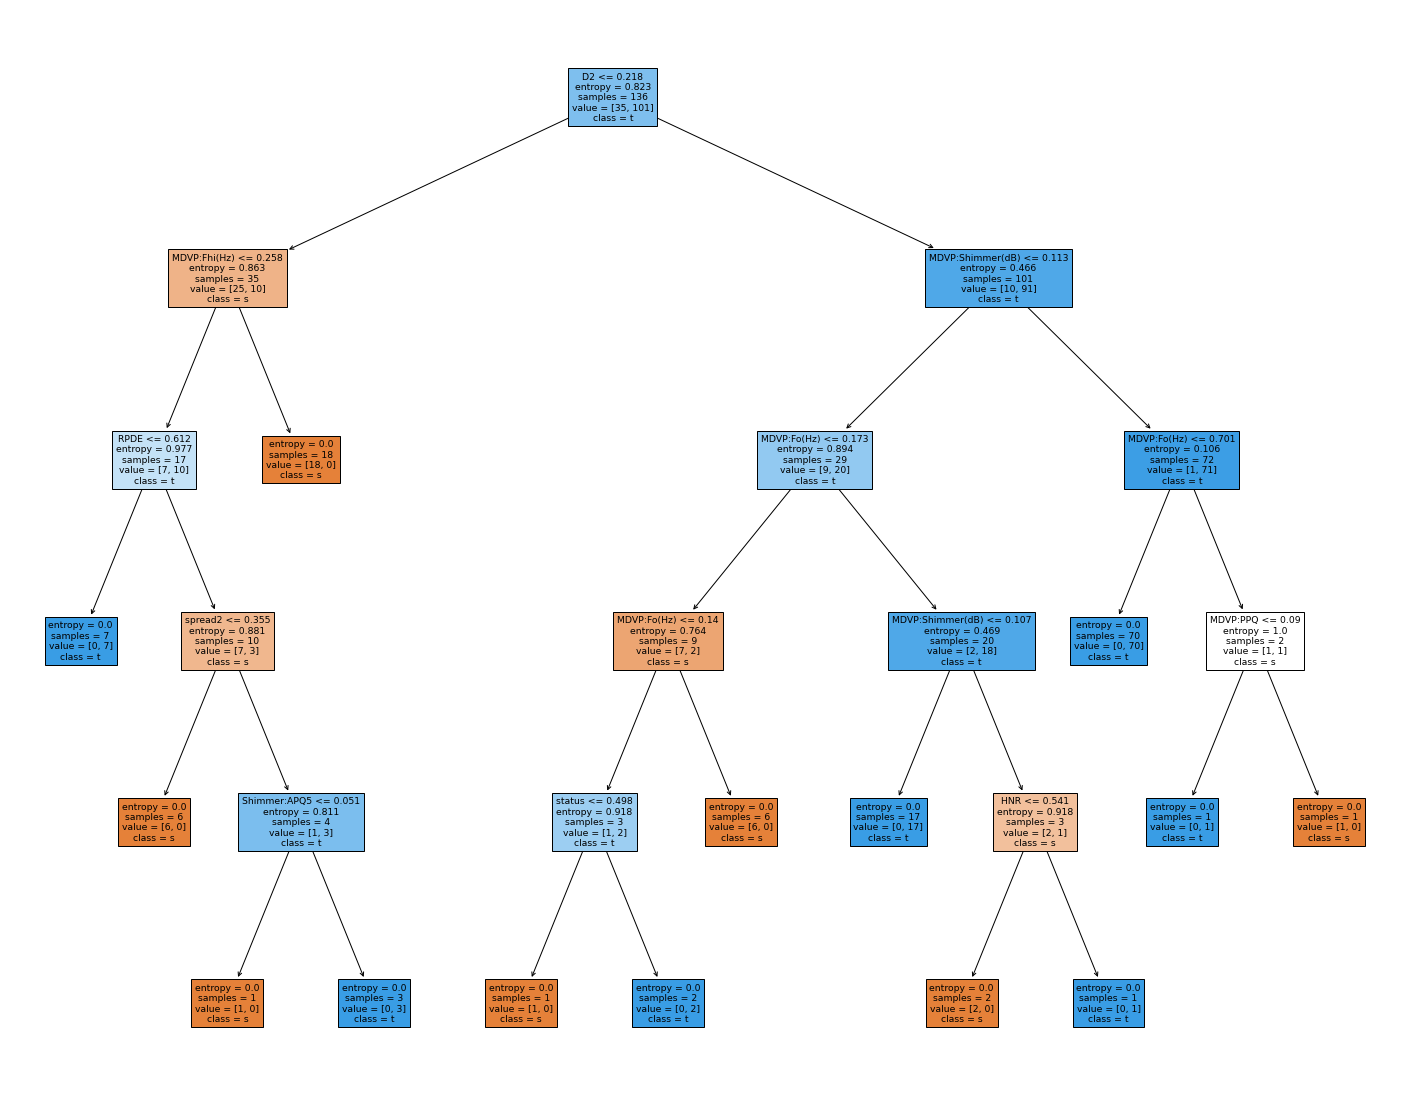

In [330]:
# Plot the tree sctructre with entropy and sample values for the model 
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt_model, 
                   feature_names=dfprksn.columns,  
                   class_names="status",
                   filled=True)

### 6. Test the model and accuracy scores

In [331]:
# Predict the target value
y_predict = dt_model.predict(scaledXtest)

In [332]:
# Accuracy score for training set
trainaccuracy = dt_model.score(scaledXtrain , y_train)
print("Accuracy score on training set:", trainaccuracy)

# Accuracy score for test set
testaccuracy = dt_model.score(scaledXtest,y_test)
print("Accuracy score on test set:", testaccuracy)

# Accurcay score for model
dtmodelscore = accuracy_score(y_test, y_predict)
print("Decision Tree model accuracy:", dtmodelscore)

Accuracy score on training set: 1.0
Accuracy score on test set: 0.9491525423728814
Decision Tree model accuracy: 0.9491525423728814


              precision    recall  f1-score   support

           0       1.00      0.77      0.87        13
           1       0.94      1.00      0.97        46

    accuracy                           0.95        59
   macro avg       0.97      0.88      0.92        59
weighted avg       0.95      0.95      0.95        59



Text(0.5, 1.0, 'Decision Tree')

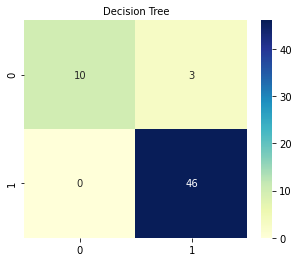

In [333]:
# Print the classification report
print(classification_report(y_test, y_predict))

# Plot the confusion matrix for Decision Tree
confusion = confusion_matrix(y_test,y_predict)
plt.figure(figsize=(5,4))
sns.heatmap(confusion,annot=True,fmt='',cmap='YlGnBu')
plt.title("Decision Tree", fontsize =10)


<b>Observations:</b>
- Model has given training acuracy is 1.0 and testing accuracy is 0.94. It shows this model is overfit. 
- Model predicted 95% (56/59) correctly.
- <b>True Negative:</b> Model predicted correctly for 10 people who are normal. 
- <b>True Positive:</b> Model predicted correctly for 46 patients who have affected with PD.
- <b>False Positive:</b> Model predicted 3 people have PD but not in real case.
- Precision score of 94% implies model predicted total 49 people affected PD but prediction is correct for 46 people and incorrect for 3 people. Precision 100% shows model predicted total 10 people are normal and it is accurate in reality. 
    

### 7. Use regularization parameters of max_depth, min_sample_leaf to recreate the model

In [334]:
# To identify the best value for max_depth and min_sample_leaf using GridSearchCV
# Set the multiple values for parameters 
param_dist = {
    "criterion":["entropy"],
    "max_depth":np.arange(1,10),
    "min_samples_leaf":np.arange(1,25)
    }

In [335]:
# Initialize the GridSearchCV and passing the parameters with more values
grid = GridSearchCV(DecisionTreeClassifier(random_state=9), param_grid=param_dist, cv=10, n_jobs=-1,)

In [336]:
# Run the model 
grid.fit(scaledXtrain, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=9), n_jobs=-1,
             param_grid={'criterion': ['entropy'],
                         'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [337]:
# To get the optimal values for max_dempth and min_samples_leaf
grid.best_params_

{'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 16}

In [338]:
# To get the accuracy score
grid.best_score_

0.8456043956043956

<b>Observations:</b>
 - The best optimal value for max_depth is 3
 - The best optimal values for min_samples_leaf is 16

Apply the best optimal values in DecisionTree Classifier and rerun the model. 

In [339]:
dtregmodel = DecisionTreeClassifier(criterion = 'entropy', max_depth=3, min_samples_leaf=16)
dtregmodel.fit(scaledXtrain, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=16)

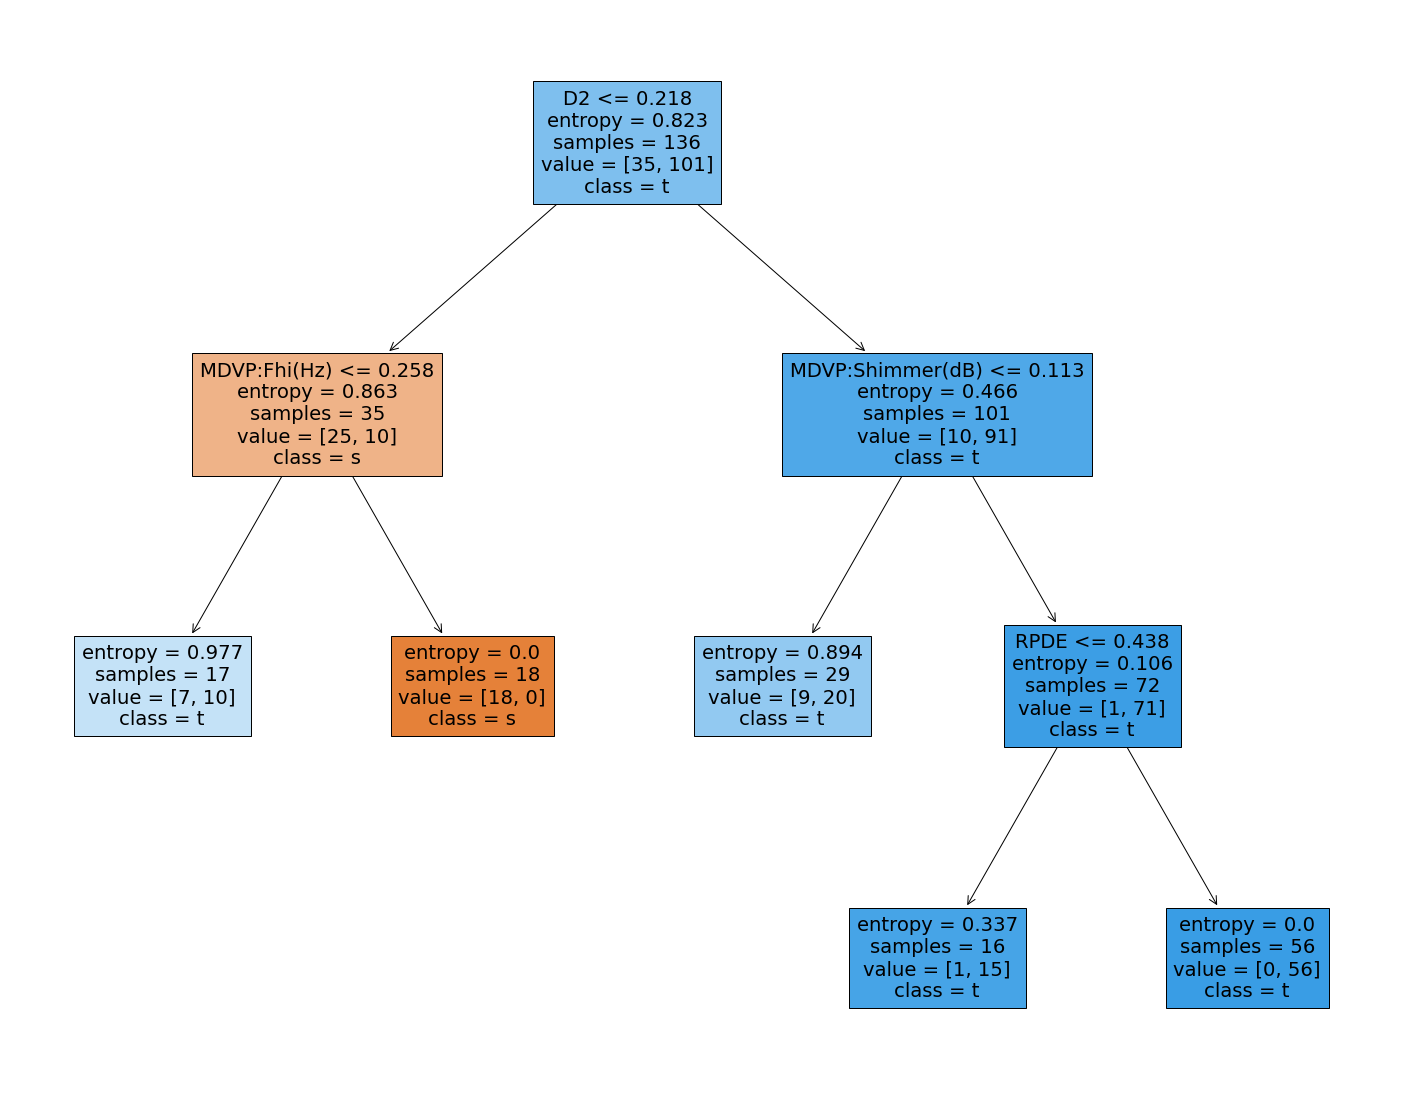

In [340]:
# Plot the tree structure 
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dtregmodel, 
                   feature_names=dfprksn.columns,  
                   class_names="status",
                   filled=True)

In [341]:
# Predict the target value
y_regpredict = dtregmodel.predict(scaledXtest)

regtrainaccuracy = dtregmodel.score(scaledXtrain , y_train)
print("Accuracy score on training set:", regtrainaccuracy)

regtestaccuracy = dtregmodel.score(scaledXtest,y_test)
print("Accuracy score on test set:", regtestaccuracy)

dtregmodelscore = accuracy_score(y_test, y_regpredict)
print("Decision Tree model accuracy:", dtregmodelscore)

Accuracy score on training set: 0.875
Accuracy score on test set: 0.847457627118644
Decision Tree model accuracy: 0.847457627118644


              precision    recall  f1-score   support

           0       1.00      0.31      0.47        13
           1       0.84      1.00      0.91        46

    accuracy                           0.85        59
   macro avg       0.92      0.65      0.69        59
weighted avg       0.87      0.85      0.81        59



Text(0.5, 1.0, 'Decision Tree')

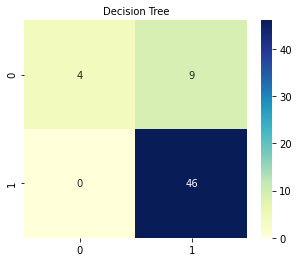

In [402]:
# Print the classification report
print(classification_report(y_test, y_regpredict))

# Plot the confusion matrix for Decision Tree
confusion = confusion_matrix(y_test,y_regpredict)
plt.figure(figsize=(5,4))
sns.heatmap(confusion,annot=True,fmt='',cmap='YlGnBu')
plt.title("Decision Tree", fontsize =10)


<b>Observations:</b>
- Run the model with best optimal values of max_depth and min_samples_leaf and model produced training and testing accuracy scores are 0.875 and 0.847 respectively. It shows dratiscally reduced the overfitting. 
- If left to its own device the tree can continue to fit till each data point is a different leaf in the tree. This obviously will not generalize well so we have to put in different criteria to stop splitting the nodes beyond a point. Earlier model has max_depth is 5 and min_samples_leaf is 1. Due to this accuracy of earlier model end up with overfitting.
- Model predicted 85% (50/59) correctly.
- <b>True Negative:</b> Model predicted correctly for 4 people who are normal.
- <b>True Positive:</b> Model predicted correctly for 46 patients who have affected with PD.
- <b>False Positive:</b> Model predicted 9 people have PD but not in real case.
- Precision score of 84% implies model predicted total 55 people affected PD but prediction is correct for 46 people and incorrect for 9 people. Precision 100% shows model predicted total 4 people are normal and it is accurate in reality
- <b>Take away:</b> Regularization prevents overfitting. 

### 8. Decision Tree using Random Forest

In [381]:
# Initialize the RandomForest classifier
rfcl = RandomForestClassifier(random_state=9)

# Fit the data into model
rfcl.fit(scaledXtrain, y_train)

# Predict values for test set
y_rfpredict = rfcl.predict(scaledXtest)

In [382]:
rftrainaccuracy = rfcl.score(scaledXtrain , y_train)
print("Accuracy score on training set:", rftrainaccuracy)

rftestaccuracy = rfcl.score(scaledXtest,y_test)
print("Accuracy score on test set:", rftestaccuracy)

rfmodelscore = accuracy_score(y_test, y_rfpredict)
print("Decision Tree model accuracy:", rfmodelscore)

Accuracy score on training set: 1.0
Accuracy score on test set: 0.9322033898305084
Decision Tree model accuracy: 0.9322033898305084


<b>Observations:</b>
- Training accuracy score is 1.0 and testing accurasy is 0.93. It shows higly overfit model.

In [383]:
# To identify the best optimal number of trees using GridSearchCV
# Set the parameters for GridSearchCV
param_dist = {
    "criterion":["entropy"],
    "max_depth":[3],
    "min_samples_leaf":[16],
    "n_estimators": np.arange(1,110)
    }

In [384]:
# Initialize the GridSearchCV with parameters
rfgrid = GridSearchCV(RandomForestClassifier(random_state=9), param_grid=param_dist, cv=10, n_jobs=-1)

In [385]:
# Fit the data into GridSearchCV
rfgrid.fit(scaledXtrain, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=9), n_jobs=-1,
             param_grid={'criterion': ['entropy'], 'max_depth': [3],
                         'min_samples_leaf': [16],
                         'n_estimators': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109])})

In [386]:
# Get the optimal values for parameters
rfgrid.best_params_

{'criterion': 'entropy',
 'max_depth': 3,
 'min_samples_leaf': 16,
 'n_estimators': 27}

<b>Observations:</b>
- The optimal number of tree is 27  

Apply the optimal number of trees in RandomForest classifier.

In [390]:
rfmodel = RandomForestClassifier(n_estimators = 27, criterion="entropy", max_depth=3, min_samples_leaf=16, random_state=9)

# Fit the data into RF model
rfmodel.fit(scaledXtrain, y_train)

# Predict the value for test set
y_rfprd = rfmodel.predict(scaledXtest)

In [391]:
# To get training accuracy score
rftrainacc = rfmodel.score(scaledXtrain , y_train)
print("Accuracy score on training set:", rftrainacc)

# To get testing accuracy score
rftestacc = rfmodel.score(scaledXtest,y_test)
print("Accuracy score on test set:", rftestacc)

# To get model accuracy score
rfmodelscr = accuracy_score(y_test, y_rfprd)
print("Decision Tree model accuracy:", rfmodelscr)

Accuracy score on training set: 0.8529411764705882
Accuracy score on test set: 0.8813559322033898
Decision Tree model accuracy: 0.8813559322033898


              precision    recall  f1-score   support

           0       0.88      0.54      0.67        13
           1       0.88      0.98      0.93        46

    accuracy                           0.88        59
   macro avg       0.88      0.76      0.80        59
weighted avg       0.88      0.88      0.87        59



Text(0.5, 1.0, 'Randome Forest')

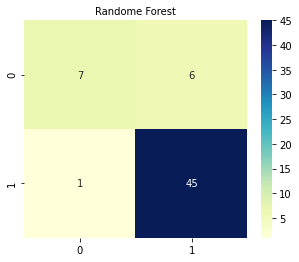

In [392]:
# Print the classification report
print(classification_report(y_test, y_rfprd))

# Plot the confusion matrix for Decision Tree
confusion = confusion_matrix(y_test,y_rfprd)
plt.figure(figsize=(5,4))
sns.heatmap(confusion,annot=True,fmt='',cmap='YlGnBu')
plt.title("Randome Forest", fontsize =10)


<b>Observations:</b>
- Model has given training acuracy is 0.85 and testing accuracy is 0.88 using optimal number of trees. 
- Model predicted 88% (52/59) correctly.
- <b>True Negative:</b> Model predicted correctly for 7 people who are normal.
- <b>True Positive:</b> Model predicted correctly for 45 patients who have affected with PD.
- <b>False Positive:</b> Model predicted 6 people have PD but not in real case.
- <b>False Negative:</b> Model predicted 1 patient is normal but the patient affected with PD in reality.
- Precision score of 88% implies model predicted total 51 people affected PD but prediction is correct for 45 people and incorrect for 6 people. Precision 88% shows model predicted total 8 people are normal but prediction is correct for 7 people and remaining 1 person who affected PD in reality.

### End Project